In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import signal
import os
import glob
%matplotlib inline
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from readTRC import readTrc
from scipy.fftpack import rfft, irfft, fftfreq

In [2]:
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

def find_vals(X,Y,cut):
    dataX = X[cut:]
    dataY = Y[cut:]
    minn = min(dataY)
    sig_val = minn*0.5
    MeanLoc = np.where(dataY==minn)[0][0]
    Mean = dataX[MeanLoc]
    L = dataY[0:MeanLoc]
    R = dataY[MeanLoc:len(dataY)]
    LP =find_nearest(L,sig_val)
    RP =find_nearest(R,sig_val)
    whereL = np.where(L==LP)[0][0]
    whereR = np.where(R==RP)[0][0]
    Lpoint = dataX[whereL]
    Rpoint = dataX[MeanLoc+whereR]
    FWHM = (Rpoint-Lpoint)   
    return (Mean,FWHM)
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [4]:
cd /Users/austinmcdonald/Desktop/Extraction-Both-100Vcm-110719/

/Users/austinmcdonald/Desktop/Extraction-Both-100Vcm-110719


In [8]:
#PATH = '/Users/austinmcdonald/Desktop/data/Ion-stuff/Ion mobilitys/Argon/090418-cleaned-2bar/'
files = glob.glob('*.txt')
#files.remove('.DS_Store')
#files.remove('Gol-350.txt')
#files.remove('Sig-350.txt')
files.sort()
len(files)

72

In [6]:
names = []
for q in range(0,len(files)):
    na = files[q].split('.')[0]
    names.append(na)
names

['Gol-0000',
 'Gol-0020',
 'Gol-0040',
 'Gol-0060',
 'Gol-0080',
 'Gol-0100',
 'Gol-0120',
 'Gol-0140',
 'Gol-0160',
 'Gol-0180',
 'Gol-0200',
 'Gol-0220',
 'Gol-0240',
 'Gol-0260',
 'Gol-0280',
 'Gol-0300',
 'Gol-0320',
 'Gol-0340',
 'Gol-0360',
 'Gol-0380',
 'Gol-0400',
 'Gol-0420',
 'Gol-0440',
 'Gol-0460',
 'Gol-0480',
 'Gol-0500',
 'Gol-0520',
 'Gol-0540',
 'Gol-0560',
 'Gol-0580',
 'Gol-0600',
 'Gol-0620',
 'Gol-0640',
 'Gol-0660',
 'Gol-0680',
 'Gol-0700',
 'Sig-0000',
 'Sig-0020',
 'Sig-0040',
 'Sig-0060',
 'Sig-0080',
 'Sig-0100',
 'Sig-0120',
 'Sig-0140',
 'Sig-0160',
 'Sig-0180',
 'Sig-0200',
 'Sig-0220',
 'Sig-0240',
 'Sig-0260',
 'Sig-0280',
 'Sig-0300',
 'Sig-0320',
 'Sig-0340',
 'Sig-0360',
 'Sig-0380',
 'Sig-0400',
 'Sig-0420',
 'Sig-0440',
 'Sig-0460',
 'Sig-0480',
 'Sig-0500',
 'Sig-0520',
 'Sig-0540',
 'Sig-0560',
 'Sig-0580',
 'Sig-0600',
 'Sig-0620',
 'Sig-0640',
 'Sig-0660',
 'Sig-0680',
 'Sig-0700']

In [7]:
ml = 1e3
avg=10
Xvals=dict()
Yvals=dict()
for q in range(0,len(files)):
    Hold = np.loadtxt(files[q])
    Xvals[q] = moving_average(Hold[0]*ml,avg)
    Yvals[q] = moving_average(Hold[1]*ml,avg)

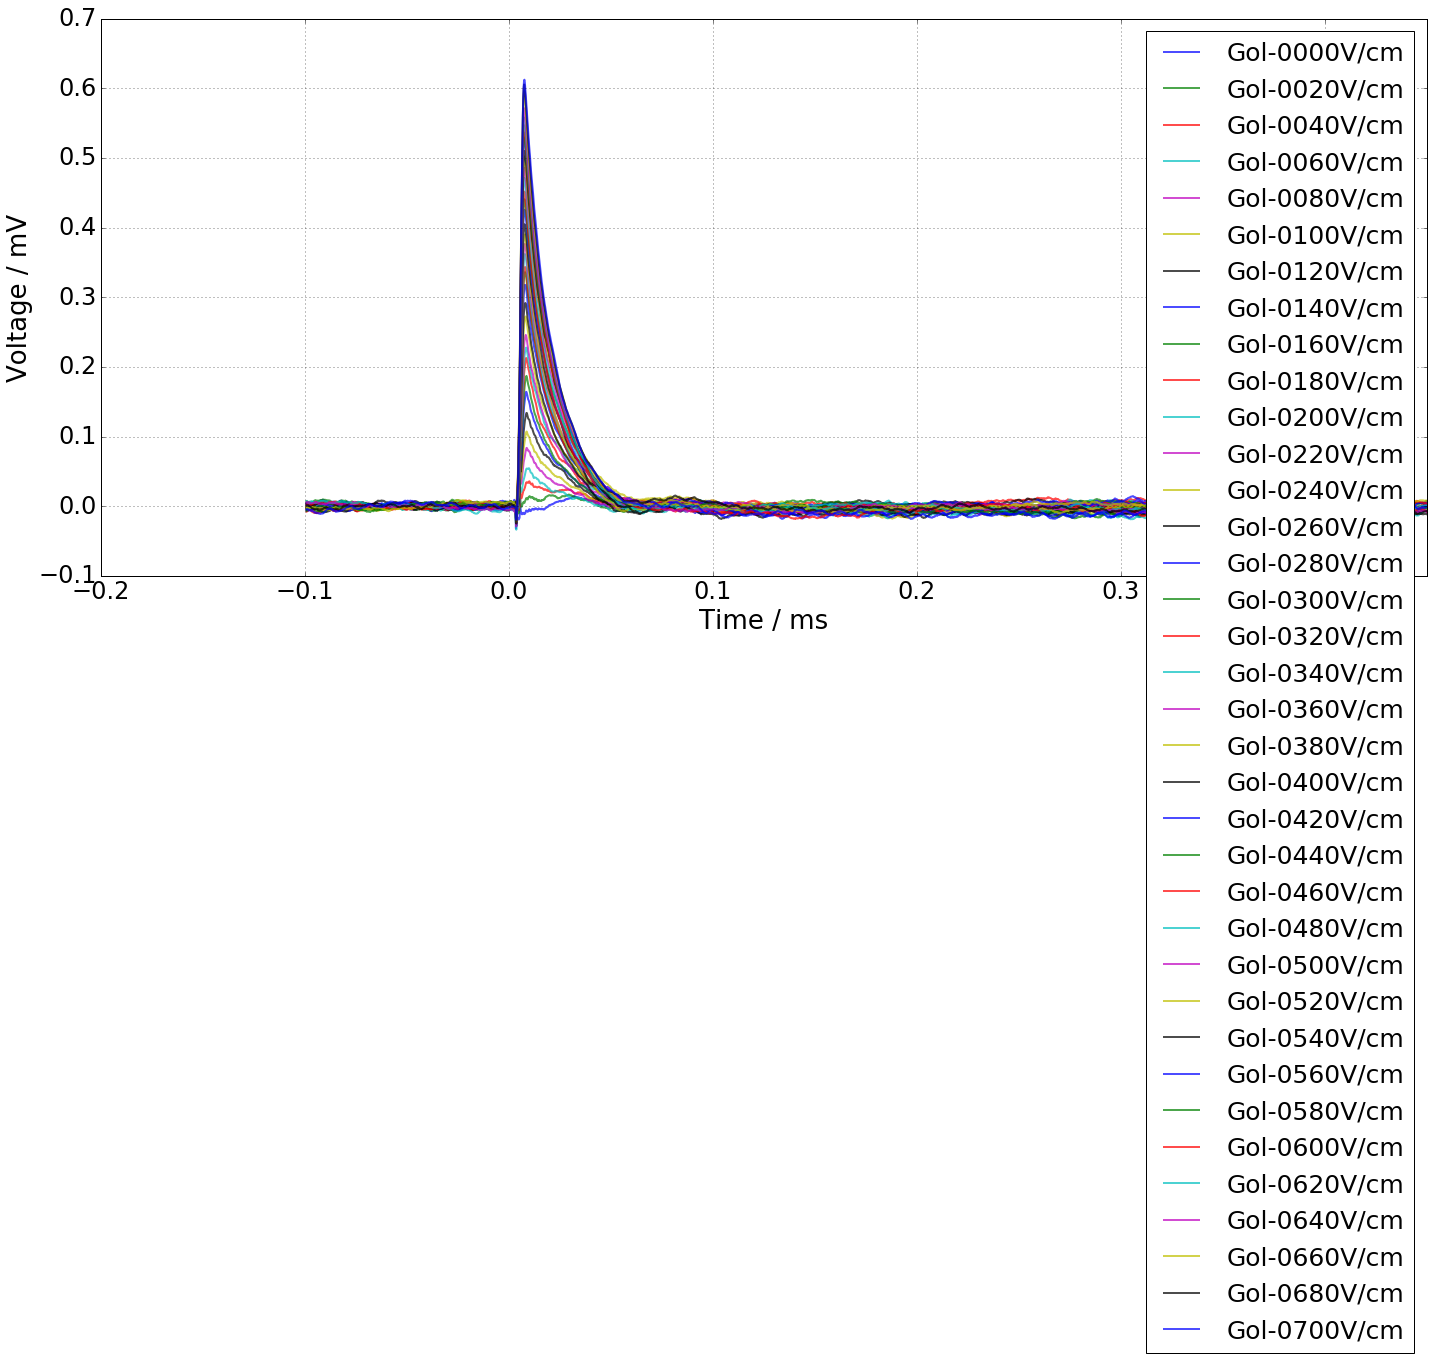

In [9]:
plt.figure(figsize=(20,9))

for q in range(0,len(files)-36):
    XX = Xvals[q]
    YY = Yvals[q]
    plt.plot(XX,YY,label=(names[q]+''+'V/cm'),alpha=0.7,linewidth=2)
    
#plt.plot(Xvals[0]*ml,Yvals[0]*ml,color='m')  
plt.xlim(-0.2,0.45)

#plt.ylim(-.05,.15)
plt.xlabel(r'Time / ms',fontsize=26)
plt.ylabel('Voltage / mV',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=25)
plt.tight_layout()
#plt.savefig('plot-1.tif')
#plt.axvline(0.025,linewidth=2,color='k')
#plt.axvline(0.01,linewidth=2,color='r')

#plt.axvline(0.085,linewidth=2,color='m')


plt.show()

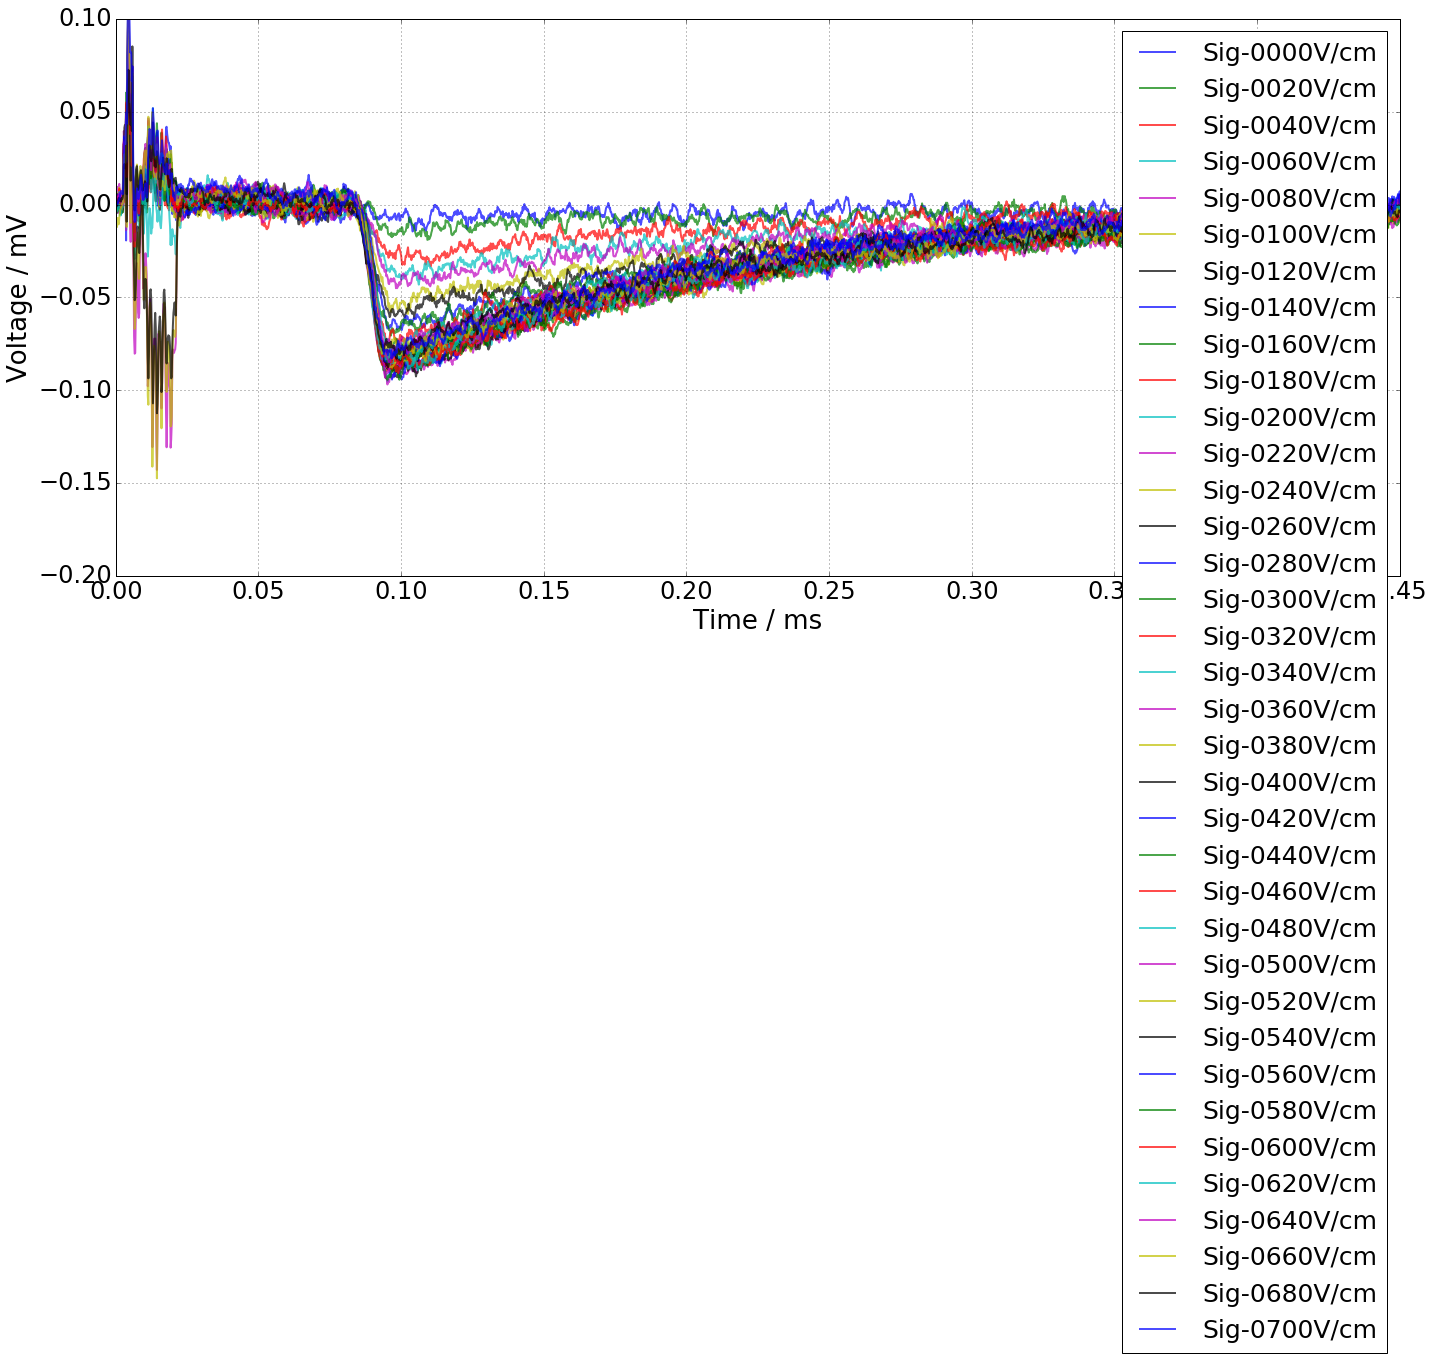

In [11]:
plt.figure(figsize=(20,9))
#col = ['b','g','r','m','y','k','c','steelblue','orange']
for q in range(36,len(files)):
    XX = Xvals[q]
    YY = Yvals[q]
    plt.plot(XX,YY,label=(names[q]+''+'V/cm'),alpha=0.7,linewidth=2)
    
#plt.plot(Xvals[0]*ml,Yvals[0]*ml,color='m')  
plt.xlim(0,0.45)

#plt.ylim(-.05,.15)
plt.xlabel(r'Time / ms',fontsize=26)
plt.ylabel('Voltage / mV',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=25)
plt.tight_layout()
#plt.savefig('plot-1.tif')
#plt.axvline(0.025,linewidth=2,color='k')
#plt.axvline(0.01,linewidth=2,color='r')

#plt.axvline(0.085,linewidth=2,color='m')
plt.ylim(-0.2,.1)

plt.show()

In [ ]:
aa = find_nearest(GX200,0.01)
L = np.where(GX200 == aa)[0][0]
aa = find_nearest(GX200,0.45)
R = np.where(GX200 == aa)[0][0]
GOLDsum = sum(abs(GY200[L:R]))*0.8


aa = find_nearest(SX200,0.025)
L = np.where(SX200 == aa)[0][0]
aa = find_nearest(SX200,0.465)
R = np.where(SX200 == aa)[0][0]
SIGsum = sum(abs(SY200[L:R]))

24.017158018
71.5466067318


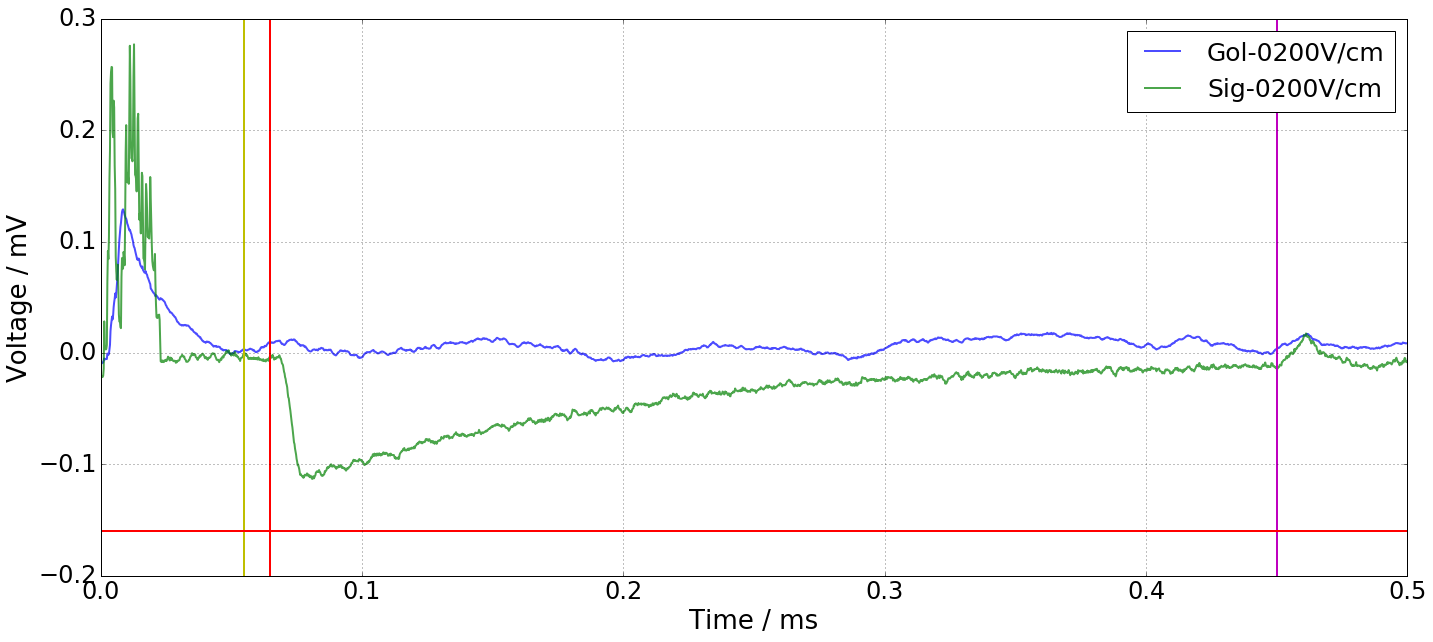

In [14]:
plt.figure(figsize=(20,9))

A = 0+2
B = 13+2

XX = Xvals[A]
YY = Yvals[A]
plt.plot(XX,YY,label=(names[A]+''+'V/cm'),alpha=0.7,linewidth=2)
aa = find_nearest(XX,0)
L = np.where(XX == aa)[0][0]
aa = find_nearest(XX,0.45)
R = np.where(XX == aa)[0][0]
GOLDsum = sum(abs(YY[L:R]))

XX = Xvals[B]
YY = Yvals[B]
plt.plot(XX,YY,label=(names[B]+''+'V/cm'),alpha=0.7,linewidth=2)
aa = find_nearest(XX,0.065)
L = np.where(XX == aa)[0][0]
aa = find_nearest(XX,0.35)
R = np.where(XX == aa)[0][0]
SIGsum = sum(abs(YY[L:R]))

#plt.plot(Xvals[0]*ml,Yvals[0]*ml,color='m')  
plt.xlim(0,0.5)
#plt.ylim(-.05,.15)
plt.xlabel(r'Time / ms',fontsize=26)
plt.ylabel('Voltage / mV',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=25)
plt.tight_layout()
#plt.savefig('plot-1.tif')
plt.axvline(0.055,linewidth=2,color='y')

plt.axvline(0.45,linewidth=2,color='m')
plt.axvline(0.065,linewidth=2,color='r')
plt.axhline(-0.160,linewidth=2,color='r')

print(GOLDsum)
print(SIGsum)

plt.show()

In [81]:
GOLD  = []
SIG   = []
GOLDM = []
SIGM  = []
extr  = []
for x in range(0,8):
    A = 0+x
    B = 13+x
    EXT = int(names[x].split('-')[1])
    extr.append(EXT)
    Corr = 1#EXT/200
    
    XX = Xvals[A]
    YY = Yvals[A]
    aa = find_nearest(XX,0)
    L = np.where(XX == aa)[0][0]
    aa = find_nearest(XX,0.45)
    R = np.where(XX == aa)[0][0]
    GOLDsum = sum(abs(YY[L:R]))
    GOLDM.append( max(abs(YY[L:R])))
    GOLD.append(GOLDsum)
    
    
    XX = Xvals[B]
    YY = Yvals[B]
    aa = find_nearest(XX,0.065)
    L = np.where(XX == aa)[0][0]
    aa = find_nearest(XX,0.35)
    R = np.where(XX == aa)[0][0]
    SIGsum = sum(abs(YY[L:R]))*Corr
    SIGM.append(max(abs(YY[L:R]))*Corr)
    SIG.append(SIGsum)

In [71]:
SIG

[14.663188668705152,
 91.818871521880538,
 106.11513856751026,
 83.608443591066361,
 81.069386957758582,
 58.08283484956376,
 61.980953033831383,
 74.108270337017217]

In [ ]:

plt.scatter(1/np.array(extr),SIG,color='k')
plt.scatter(1/np.array(extr),GOLD,color='r')
plt.semilogy()
plt.xlim(0,0.005)
plt.show()

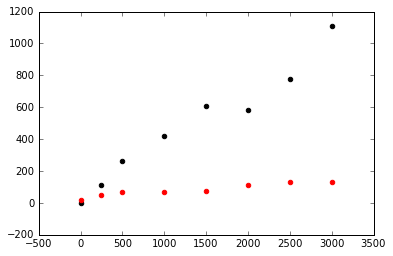

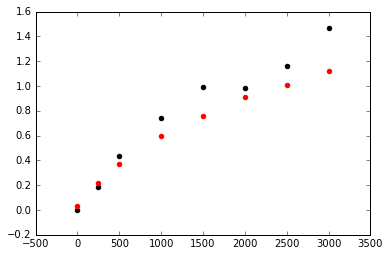

In [89]:
plt.scatter(extr,SIG,color='k')
plt.scatter(extr,GOLD,color='r')
plt.show()

plt.scatter(extr,SIGM,color='k')
plt.scatter(extr,GOLDM,color='r')
plt.show()

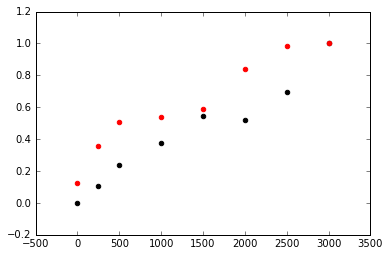

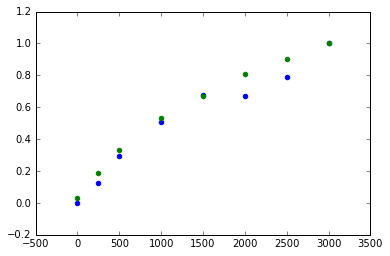

In [83]:
plt.scatter(extr,SIG/max(SIG),color='k')
plt.scatter(extr,GOLD/max(GOLD),color='r')
plt.show()
plt.scatter(extr,SIGM/max(SIGM),color='b')
plt.scatter(extr,GOLDM/max(GOLDM),color='g')
plt.show()

In [100]:
func(xx,100,5)

array([ 100.])

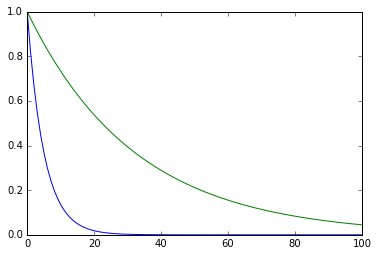

In [110]:
def func(x, a, tau):
    return a * np.exp(- x/tau) #+ c
xx = np.linspace(0,100,100)

plt.plot(xx,func(xx,1,5))
plt.plot(xx,func(xx,1,5*6.44))

14.1046121151
15.1929314226


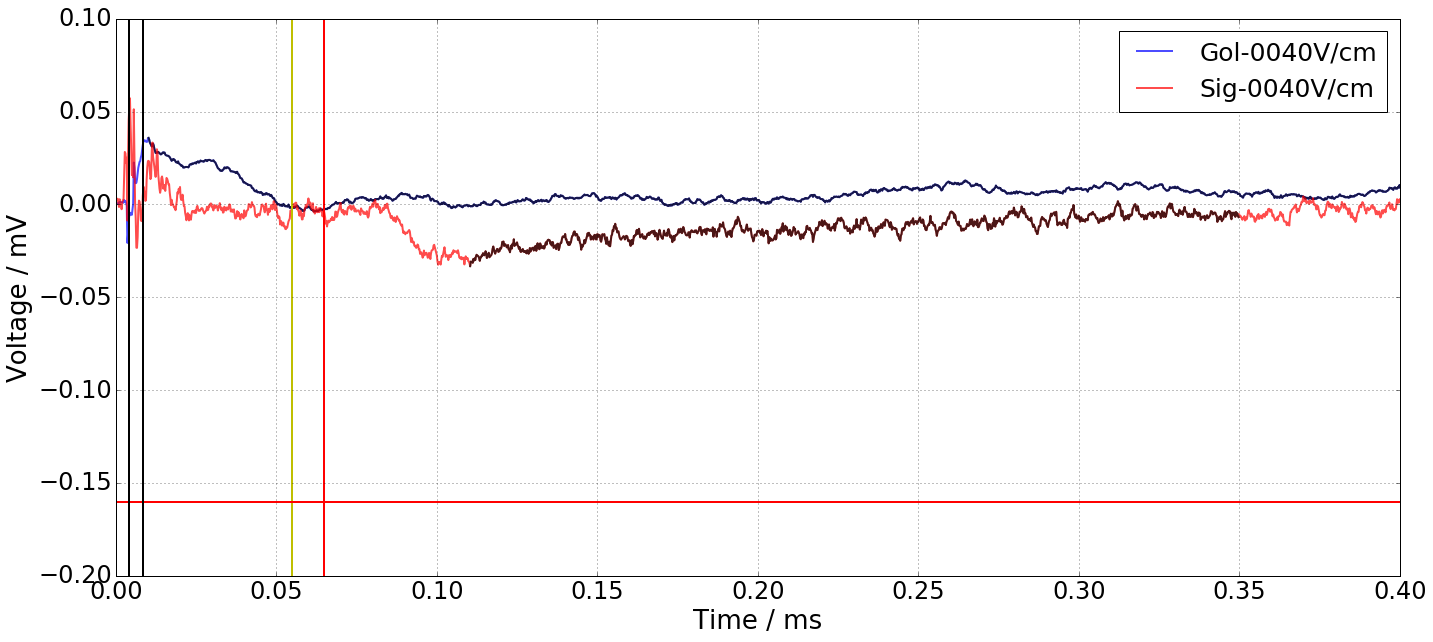

In [169]:
plt.figure(figsize=(20,9))

A =  0+2
B = 36+2

XX = Xvals[A]
YY = Yvals[A]
plt.plot(XX,YY,label=(names[A]+''+'V/cm'),alpha=0.7,linewidth=2,color='b')
aa = find_nearest(XX,0)
L = np.where(XX == aa)[0][0]
L = np.where(YY == max(YY))[0][0] # added this for exp fit
aa = find_nearest(XX,0.45)
R = np.where(XX == aa)[0][0]
GOLDsum = sum(abs(YY[L:R]))
plt.plot(XX[L:R],YY[L:R],alpha=0.7,linewidth=2,color='k')
golF = YY[L:R]

XX = Xvals[B]
YY = Yvals[B]
plt.plot(XX,YY,label=(names[B]+''+'V/cm'),alpha=0.7,linewidth=2,color='r')
aa = find_nearest(XX,0.065)
L = np.where(XX == aa)[0][0]
L = np.where(YY == min(YY))[0][0] # added this for exp fit
aa = find_nearest(XX,0.35)
R = np.where(XX == aa)[0][0]
SIGsum = sum(abs(YY[L:R]))
plt.plot(XX[L:R],YY[L:R],alpha=0.7,linewidth=2,color='k')
sigF = abs(YY[L:R])

#plt.plot(Xvals[0]*ml,Yvals[0]*ml,color='m')  
plt.xlim(0,0.4)
#plt.ylim(-.05,.15)
plt.xlabel(r'Time / ms',fontsize=26)
plt.ylabel('Voltage / mV',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=25)
plt.tight_layout()
#plt.savefig('plot-1.tif')
plt.axvline(0.055,linewidth=2,color='y')

plt.axvline(0.45,linewidth=2,color='m')
plt.axvline(0.065,linewidth=2,color='r')
plt.axhline(-0.160,linewidth=2,color='r')
plt.axvline(0.004,linewidth=2,color='k')
plt.axvline(0.0085,linewidth=2,color='k')

print(GOLDsum)
print(SIGsum)

plt.show()

RC = 0.0153714425248


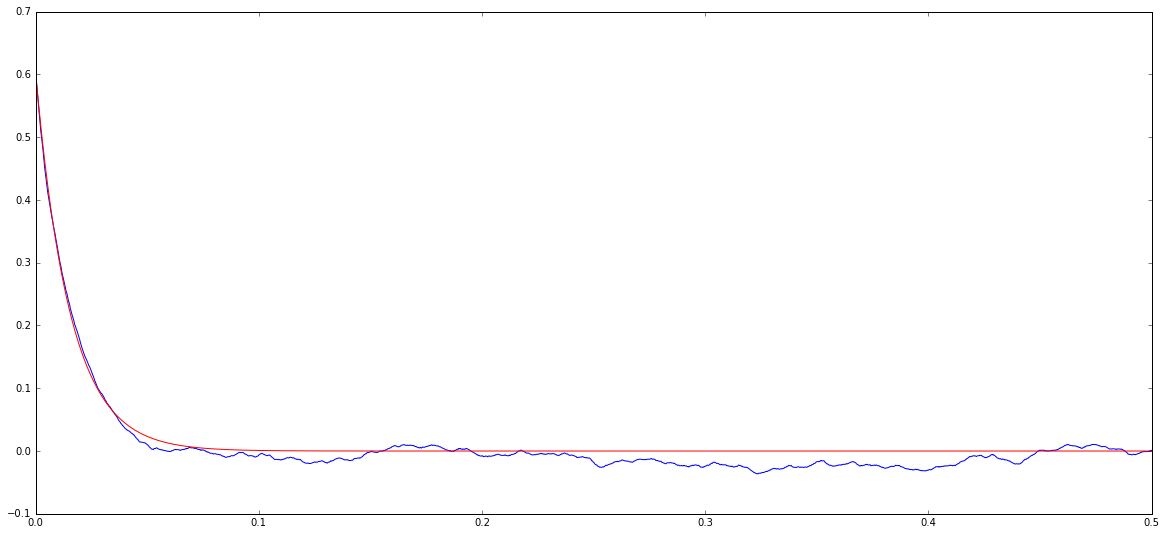

In [132]:
plt.figure(figsize=(20,9))
LL = len(golF)
xxx = np.linspace(0,0.5,LL)
plt.plot(xxx,golF)

def func(x, a, tau):
    return a * np.exp(- x/tau) #+ c
popt, pcov = curve_fit(func, xxx, golF)
plt.plot(xxx, func(xxx, *popt), 'r-', label="Fitted Curve")
print('RC =',popt[1])
plt.show()

In [126]:
popt

array([ 0.60284979,  0.01537144])

RC = 0.21843505608


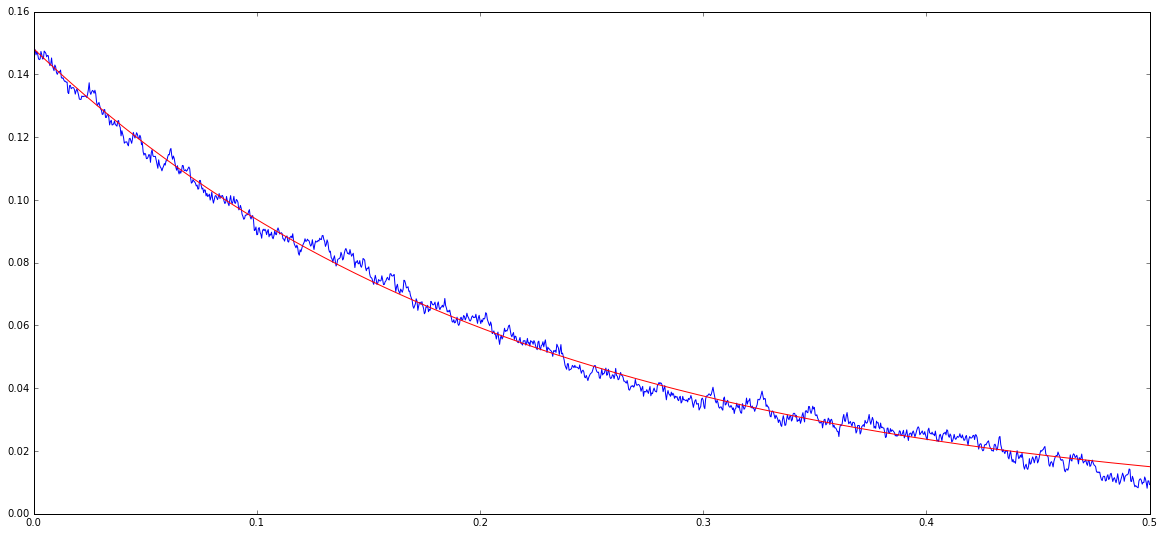

In [133]:
plt.figure(figsize=(20,9))
LL = len(sigF)
xxx = np.linspace(0,0.5,LL)
plt.plot(xxx,sigF)

def func(x, a, tau):
    return a * np.exp(- x/tau) #+ c
popt, pcov = curve_fit(func, xxx, sigF)
plt.plot(xxx, func(xxx, *popt), 'r-', label="Fitted Curve")
print('RC =',popt[1])
plt.show()

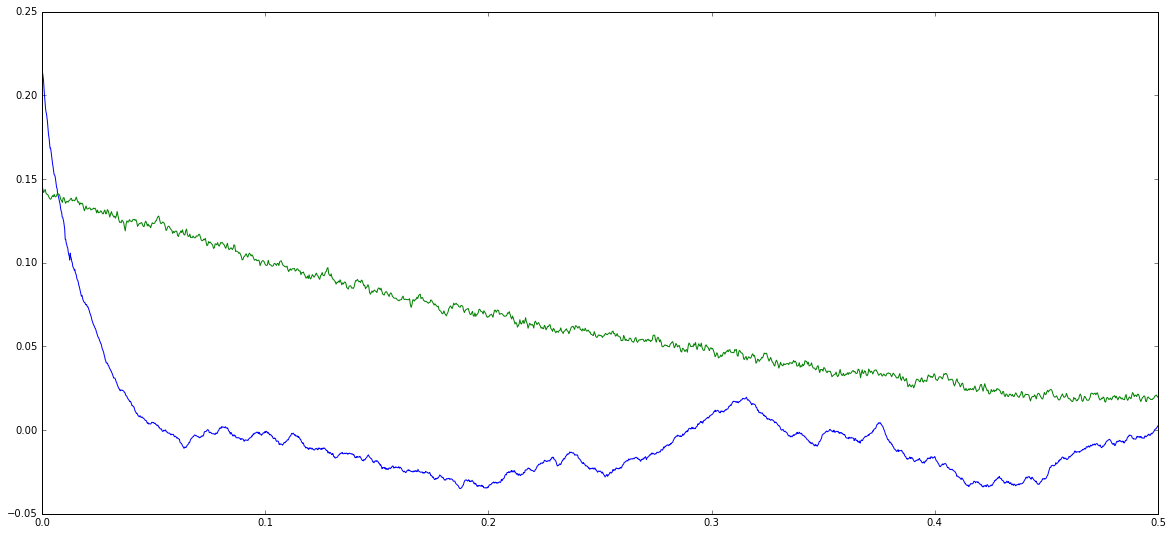

In [237]:
plt.figure(figsize=(20,9))
LL = len(golF)
xxx = np.linspace(0,0.5,LL)
plt.plot(xxx,golF)

LL = len(sigF)
xxx = np.linspace(0,0.5,LL)
plt.plot(xxx,sigF)

30.9408535036
47.5184329801


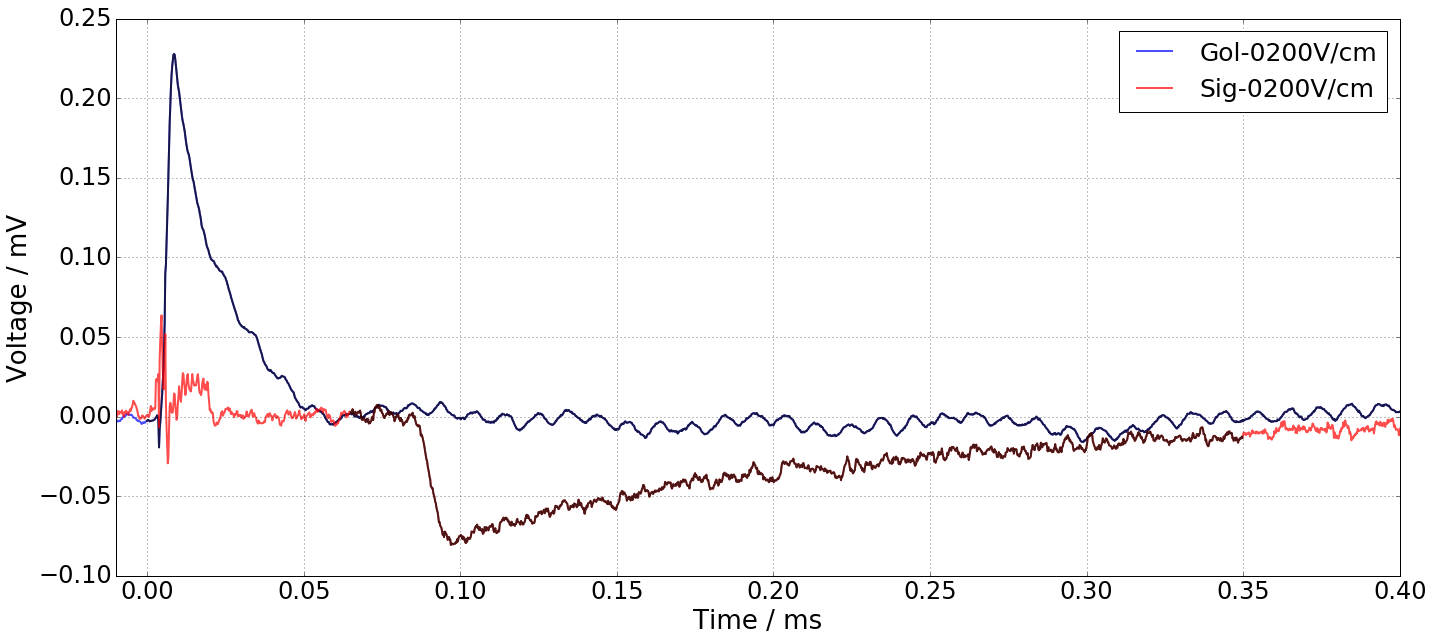

In [173]:
plt.figure(figsize=(20,9))

A = 0 +10
B = 36+10

XX = Xvals[A]
YY = Yvals[A]
plt.plot(XX,YY,label=(names[A]+''+'V/cm'),alpha=0.7,linewidth=2,color='b')
aa = find_nearest(XX,0)
L = np.where(XX == aa)[0][0]
#L = np.where(YY == max(YY))[0][0] # added this for exp fit
aa = find_nearest(XX,0.45)
R = np.where(XX == aa)[0][0]
GOLDsum = sum(abs(YY[L:R]))
plt.plot(XX[L:R],YY[L:R],alpha=0.7,linewidth=2,color='k')
golF = YY[L:R]

XX = Xvals[B]
YY = Yvals[B]
plt.plot(XX,YY,label=(names[B]+''+'V/cm'),alpha=0.7,linewidth=2,color='r')
aa = find_nearest(XX,0.065)
L = np.where(XX == aa)[0][0]
#L = np.where(YY == min(YY))[0][0] # added this for exp fit
aa = find_nearest(XX,0.35)
R = np.where(XX == aa)[0][0]
SIGsum = sum(abs(YY[L:R]))
plt.plot(XX[L:R],YY[L:R],alpha=0.7,linewidth=2,color='k')
sigF = abs(YY[L:R])

#plt.plot(Xvals[0]*ml,Yvals[0]*ml,color='m') 
#plt.xlim(-0.50,0.05)
plt.xlim(-0.01,0.4)
#plt.ylim(-0.2,.1)
#plt.ylim(-.05,.15)
plt.xlabel(r'Time / ms',fontsize=26)
plt.ylabel('Voltage / mV',fontsize=26)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
#plt.xticks(np.arange(0, 400, 50.0))
plt.grid()
plt.legend(loc='upper right',fontsize=25)
plt.tight_layout()
#plt.savefig('plot-1.tif')
#plt.axvline(0.0039,linewidth=2,color='y')
#plt.axvline(0.0076,linewidth=2,color='g')

#plt.axvline(0.075,linewidth=2,color='m')
#plt.axvline(0.066,linewidth=2,color='r')

#plt.axvline(XX[2120],linewidth=2,color='k')
#plt.axvline(XX[2300],linewidth=2,color='m')

print(GOLDsum*1.125)
print(SIGsum*1.02)
plt.savefig('/Users/austinmcdonald/Desktop/waveforms.png')
plt.show()

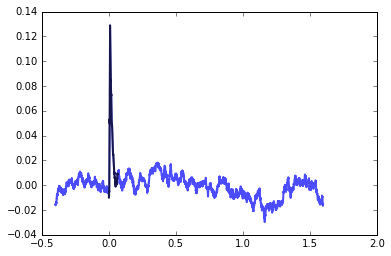

In [77]:
A = 0 +2
B = 13+2

XX = Xvals[A]
YY = Yvals[A]
plt.plot(XX,YY,label=(names[A]+''+'V/cm'),alpha=0.7,linewidth=2,color='b')
aa = find_nearest(XX,0)
L = np.where(XX == aa)[0][0]
#L = np.where(YY == max(YY))[0][0] # added this for exp fit
aa = find_nearest(XX,0.065)
R = np.where(XX == aa)[0][0]
GOLDsum = sum(abs(YY[L:R]))
plt.plot(XX[L:R],YY[L:R],alpha=0.7,linewidth=2,color='k')


In [114]:
def GridCorr(Eext, Edrift, r, d):
    rho = 2*np.pi*r/d
    A = (Edrift - Eext)/(np.pi*Eext)
    B = rho*(Edrift + Eext)/(Edrift - Eext)
    C = ((Edrift - Eext)/(Edrift + Eext))/rho
    
    Factor = A*np.sqrt(B**2-1)- np.arccos(C)
    return Factor

In [174]:
rr = 2*np.pi*0.00635/0.25
rr

0.1595929068023615

In [175]:
GridCorr(50,100,0.00635,0.5)

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in sqrt
//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in arccos


nan

In [120]:
(rr*(100 - extr)/(np.pi*extr))**2-1

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


array([        inf, -0.98967744, -0.99854839, -0.99971326, -0.99995968,
       -1.        , -0.99998208, -0.99994733, -0.99990927, -0.99987256,
       -0.99983871, -0.99980805, -0.99978047, -0.99975568, -0.99973338,
       -0.99971326, -0.99969506, -0.99967854, -0.99966348, -0.99964972,
       -0.9996371 , -0.99962549, -0.99961477, -0.99960485, -0.99959565,
       -0.9995871 , -0.99957912, -0.99957166, -0.99956468, -0.99955813,
       -0.99955197, -0.99954617, -0.9995407 , -0.99953553, -0.99953064,
       -0.999526  ])

In [117]:
(100 + extr)/(100 - extr)

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


array([  1.        ,   1.5       ,   2.33333333,   4.        ,
         9.        ,          inf, -11.        ,  -6.        ,
        -4.33333333,  -3.5       ,  -3.        ,  -2.66666667,
        -2.42857143,  -2.25      ,  -2.11111111,  -2.        ,
        -1.90909091,  -1.83333333,  -1.76923077,  -1.71428571,
        -1.66666667,  -1.625     ,  -1.58823529,  -1.55555556,
        -1.52631579,  -1.5       ,  -1.47619048,  -1.45454545,
        -1.43478261,  -1.41666667,  -1.4       ,  -1.38461538,
        -1.37037037,  -1.35714286,  -1.34482759,  -1.33333333])

In [121]:
np.arccos(((100 - extr)/(100 + extr))/rr)

//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in arccos
  if __name__ == '__main__':


array([        nan,         nan,         nan,         nan,         nan,
        1.57079633,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan])

In [162]:
GOLD  = []
SIG   = []
GOLDM = []
SIGM  = []
extr  = []
for x in range(1,36):
    A = 0+x
    B = 36+x
    EXT = int(names[x].split('-')[1])
    extr.append(EXT)
    if (100/EXT) >1.171:
        Corr = 1
    else:
        Corr = EXT/100
    #Corr = (1/1-EXT/100)#(EXT - 100)/EXT    ##1#EXT/100
    
    XX = Xvals[A]
    YY = Yvals[A]
    aa = find_nearest(XX,0)
    L = np.where(XX == aa)[0][0]
    aa = find_nearest(XX,0.45)
    R = np.where(XX == aa)[0][0]
    GOLDsum = sum(abs(YY[L:R]))
    maxx = abs(np.mean(YY[1600:1900]) - max(YY[L:R]))
    GOLDM.append( maxx*1.15)
    GOLD.append(GOLDsum*1.15)
    
    
    XX = Xvals[B]
    YY = Yvals[B]
    aa = find_nearest(XX,0.065)
    L = np.where(XX == aa)[0][0]
    aa = find_nearest(XX,0.35)
    R = np.where(XX == aa)[0][0]
    SIGsum = sum(abs(YY[L:R]))*Corr
    ugh = np.mean(YY[2120:2300])
    if ugh<0:
        hh = min(YY[L:R])+ np.mean(YY[2120:2300])
        maxx = abs(hh)
    else:
        hh = min(YY[L:R])- np.mean(YY[2120:2300])
        maxx = abs(hh)
    SIGM.append(maxx*Corr*1.023)
    SIG.append(SIGsum*1.023)
SIGM = np.array(SIGM)
GOLDM = np.array(GOLDM)
extr = np.array(extr)

In [151]:
GOLDM

array([ 0.02362687,  0.03217865,  0.06236913,  0.10205674,  0.12391213,
        0.14778807,  0.18440598,  0.21605125,  0.24799592,  0.26620473,
        0.28843182,  0.32229019,  0.34337683,  0.36761579,  0.38806516,
        0.39420599,  0.42136661,  0.43115869,  0.45944917,  0.47341737,
        0.48827093,  0.51851281,  0.52621911,  0.55343665,  0.55993831,
        0.57567827,  0.59754502,  0.6204267 ,  0.62595729,  0.63096878,
        0.64567242,  0.66117482,  0.68858398,  0.69901513,  0.7188627 ])

In [152]:
SIGM

array([ 0.0236666 ,  0.03963106,  0.05496229,  0.05596162,  0.07294918,
        0.0896535 ,  0.11283045,  0.13614796,  0.15608897,  0.19079629,
        0.21776578,  0.24606262,  0.28684471,  0.28537746,  0.32897705,
        0.35109425,  0.37741804,  0.42390159,  0.412785  ,  0.43837073,
        0.47551719,  0.50575293,  0.48930251,  0.51481828,  0.56228315,
        0.54426347,  0.56280842,  0.53924709,  0.60992678,  0.6284084 ,
        0.62404195,  0.62191015,  0.64257615,  0.67300212,  0.676356  ])

In [153]:
np.exp(-65/300)

0.80519832401807057

In [154]:
SIGM/GOLDM

array([ 1.00168152,  1.23159517,  0.88124197,  0.54833827,  0.588717  ,
        0.60663554,  0.61185896,  0.63016512,  0.62940137,  0.71672762,
        0.75499915,  0.76348156,  0.8353642 ,  0.77629272,  0.84773663,
        0.8906365 ,  0.89569992,  0.98316838,  0.89843452,  0.92597095,
        0.97387978,  0.97539139,  0.92984556,  0.93022081,  1.00418768,
        0.94542993,  0.94186782,  0.8691552 ,  0.9743904 ,  0.99594214,
        0.96649932,  0.94061378,  0.93318487,  0.9627862 ,  0.94086952])

In [155]:
-85e-6/np.log(0.88124197)

0.00067234581645897028

In [156]:
-85e-6/np.log(SIGM/GOLDM)

array([-0.05059206, -0.00040805,  0.00067235,  0.00014146,  0.00016043,
        0.00017006,  0.00017303,  0.00018407,  0.00018359,  0.00025521,
        0.00030245,  0.00031497,  0.00047252,  0.00033567,  0.00051457,
        0.0007339 ,  0.00077168,  0.0050074 ,  0.00079364,  0.00110515,
        0.0032115 ,  0.0034114 ,  0.0011686 ,  0.00117512, -0.02034011,
        0.00151473,  0.00141926,  0.00060613,  0.00327638,  0.02090445,
        0.00249452,  0.00138837,  0.00122918,  0.00224133,  0.00139457])

In [157]:
print('fields',extr[5:11])
print('times',-85e-6/np.log(SIGM/GOLDM)[5:11])
print('mean time',np.mean(-85e-6/np.log(SIGM/GOLDM)[5:11]))

fields [120 140 160 180 200 220]
times [ 0.00017006  0.00017303  0.00018407  0.00018359  0.00025521  0.00030245]
mean time 0.00021140143181


In [158]:
np.exp(-85/187)

0.63473641894028188

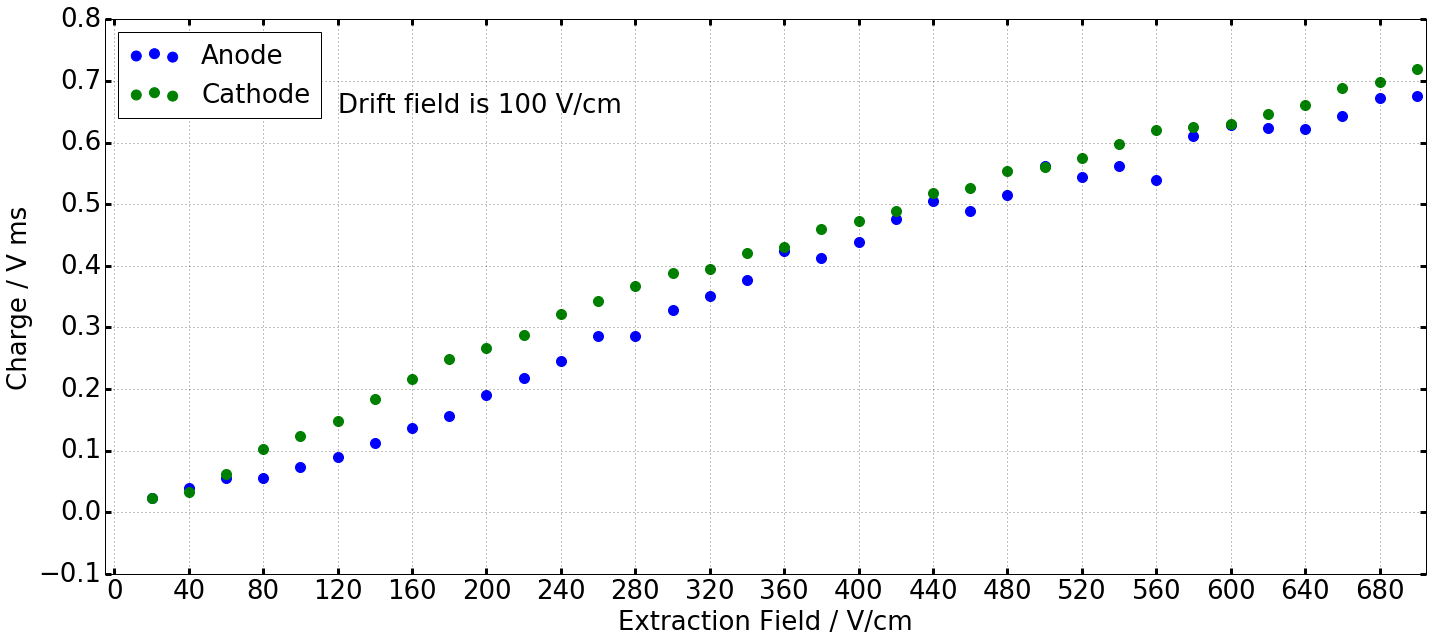

In [163]:
plt.figure(figsize=(20,9))

plt.scatter(extr,SIGM,color='b',label='Anode',s=100)
#plt.errorbar(extr,SIGM,yerr=7.66e-3,xerr=0.025,color='b',alpha=0.9,fmt='D',markersize=3,linewidth=1.4)

plt.scatter(extr,GOLDM,color='g',label='Cathode',s=100)
#plt.errorbar(extr,GOLDM,yerr=5.55e-3,xerr=0.025,color='g',alpha=0.9,fmt='D',markersize=3,linewidth=1.4)
plt.legend(loc='upper left',fontsize=26)
plt.xlim(-5,705)
#plt.ylim(-0.01,0.75)

plt.text(120,0.65,'Drift field is 100 V/cm',fontsize=26)
plt.xlabel(r'Extraction Field / V/cm',fontsize=26)
plt.ylabel('Charge / V ms',fontsize=26)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.xticks(np.arange(0, 701, 40.0))
plt.grid()
plt.tight_layout()
plt.tick_params(axis='both', which='major', width=3, length=6)
#plt.savefig("/Users/austinmcdonald/Desktop/extractionfield.png")
plt.show()

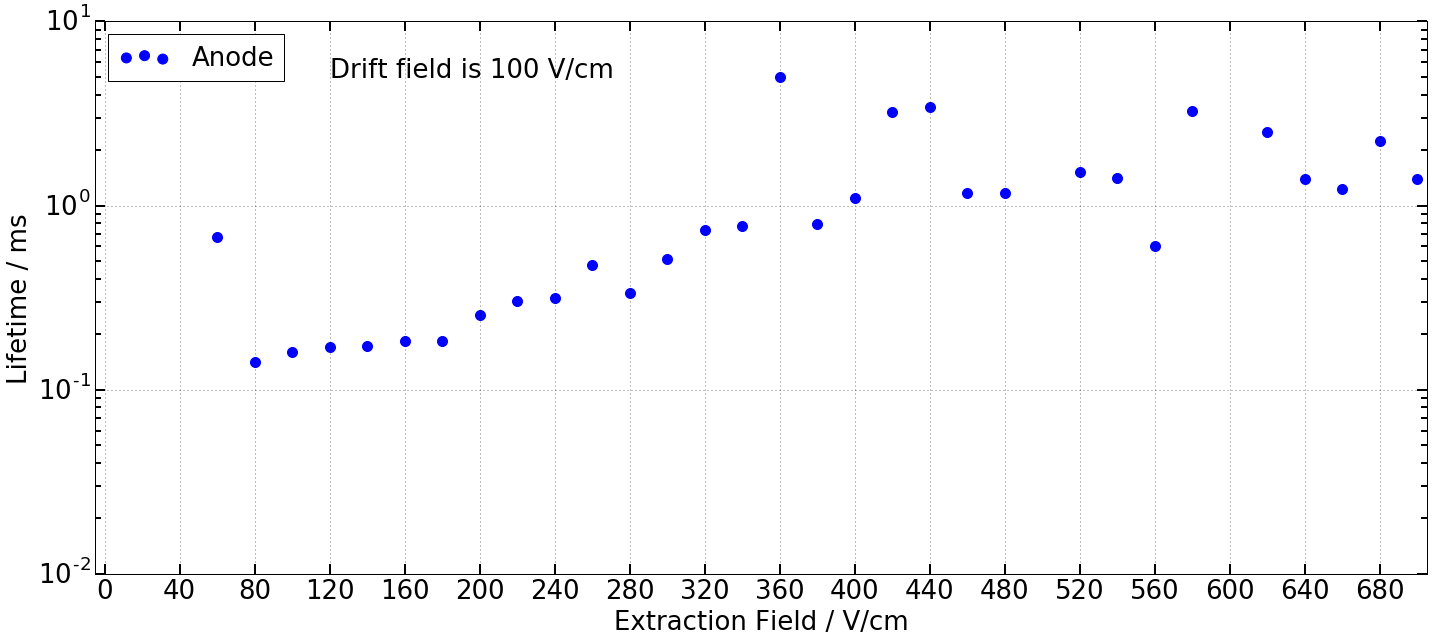

In [164]:
plt.figure(figsize=(20,9))
plt.scatter(extr,(-85e-6/np.log(SIGM/GOLDM))*1e3,color='b',label='Anode',s=100)
plt.semilogy()
plt.ylim(10e-3,10)
plt.xlim(-5,705)
plt.text(120,5,'Drift field is 100 V/cm',fontsize=26)

plt.legend(loc='upper left',fontsize=26)
plt.xlabel(r'Extraction Field / V/cm',fontsize=26)
plt.ylabel('Lifetime / ms',fontsize=26)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.xticks(np.arange(0, 701, 40.0))
plt.grid()
plt.tight_layout()
plt.tick_params(axis='both', which='major', width=2, length=10)
plt.tick_params(axis='both', which='minor', width=2, length=6)
#plt.savefig("/Users/austinmcdonald/Desktop/lifetimefield.png")


plt.show()

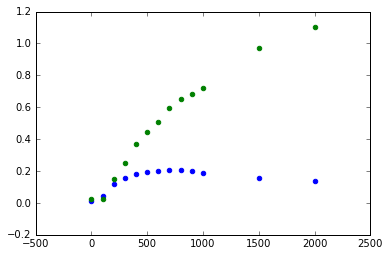

In [40]:
plt.scatter(extr,SIGM,color='b')
plt.scatter(extr,GOLDM,color='g')
plt.show()

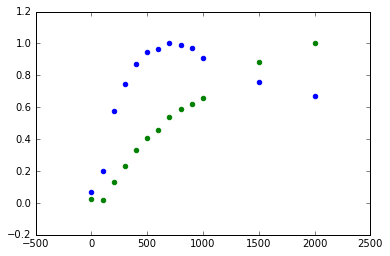

In [41]:
plt.scatter(extr,SIGM/max(SIGM),color='b')
plt.scatter(extr,GOLDM/max(GOLDM),color='g')
plt.show()

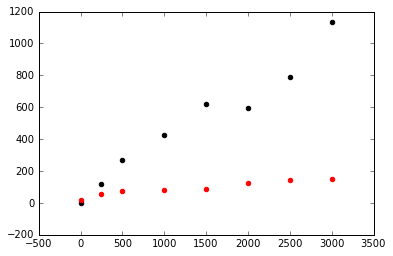

In [230]:
plt.scatter(extr,SIG,color='k')
plt.scatter(extr,GOLD,color='r')
plt.show()


In [8]:
Hold = np.loadtxt('Gol-200.txt')
GX200 = moving_average(Hold[0]*ml,avg)
GY200 = moving_average(Hold[1]*ml,avg)
Hold = np.loadtxt('Sig-200.txt')
SX200 = moving_average(Hold[0]*ml,avg)
SY200 = moving_average(Hold[1]*ml,avg)

In [9]:
aa = find_nearest(GX200,0.01)
L = np.where(GX200 == aa)[0][0]
aa = find_nearest(GX200,0.45)
R = np.where(GX200 == aa)[0][0]
GOLDsum = sum(abs(GY200[L:R]))*0.8


aa = find_nearest(SX200,0.025)
L = np.where(SX200 == aa)[0][0]
aa = find_nearest(SX200,0.465)
R = np.where(SX200 == aa)[0][0]
SIGsum = sum(abs(SY200[L:R]))

In [10]:
SIGsum/GOLDsum

0.32593764825619781

In [12]:
25/3000

0.008333333333333333

In [76]:
-0.085/np.log(SIGsum/GOLDsum)

0.093110348354314088